In [50]:
import numpy as np
import sympy
from sympy import symbols
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols
import scipy
import matplotlib.pyplot as plt

In [2]:
theta=dynamicsymbols('theta')
rx,ry=symbols('rx,ry')
A=ReferenceFrame('A')
B=A.orientnew('B','Axis',(theta,A.z))

r=rx*A.x+ry*A.y
r

rx*A.x + ry*A.y

In [3]:
r.express(B)

(rx*cos(theta(t)) + ry*sin(theta(t)))*B.x + (-rx*sin(theta(t)) + ry*cos(theta(t)))*B.y

## Direct Kinematics

In [7]:
theta1,theta2=dynamicsymbols('theta1,theta2')
l1,l2=symbols('l1,l2')
N=ReferenceFrame('N')
A=N.orientnew('A','Axis',(theta1-sympy.pi/2,N.z))
B=A.orientnew('B','Axis',(theta2,N.z))
r=l1*A.x+l2*B.x
r

l1*A.x + l2*B.x

In [10]:
r.express(N)

(l1*sin(theta1(t)) + l2*(sin(theta1(t))*cos(theta2(t)) + sin(theta2(t))*cos(theta1(t))))*N.x + (-l1*cos(theta1(t)) + l2*(sin(theta1(t))*sin(theta2(t)) - cos(theta1(t))*cos(theta2(t))))*N.y

In [9]:
sympy.Matrix([r.express(N).dot(N.x),r.express(N).dot(N.y)])              

Matrix([
[ l1*sin(theta1(t)) + l2*(sin(theta1(t))*cos(theta2(t)) + sin(theta2(t))*cos(theta1(t)))],
[-l1*cos(theta1(t)) + l2*(sin(theta1(t))*sin(theta2(t)) - cos(theta1(t))*cos(theta2(t)))]])

In [26]:
fq=sympy.Matrix([r.express(N).dot(N.x),r.express(N).dot(N.y)])
params={l1:2.0,l2:1.5}
fq_fun=sympy.lambdify([theta1,theta2],(fq.subs(params)))
fq_fun(np.deg2rad(120),np.deg2rad(45))

array([[2.12027938],
       [2.44888874]])

## Inverse Kinematics

In [48]:
p_star=[2.12,1.0]

def error_fun(q):    
    er=p_star-fq_fun(*q).flatten()    
    return np.square(er).sum()

q0=[np.deg2rad(120),np.deg2rad(45)]
scipy.optimize.minimize(error_fun,q0)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.9487684591858327e-12
        x: [ 1.324e+00  1.697e+00]
      nit: 6
      jac: [ 4.503e-06  5.184e-06]
 hess_inv: [[ 1.273e-01 -1.045e-01]
            [-1.045e-01  3.229e-01]]
     nfev: 24
     njev: 8

In [49]:
out=scipy.optimize.minimize(error_fun,q0)
np.rad2deg(out.x)

array([75.84553827, 97.23472255])

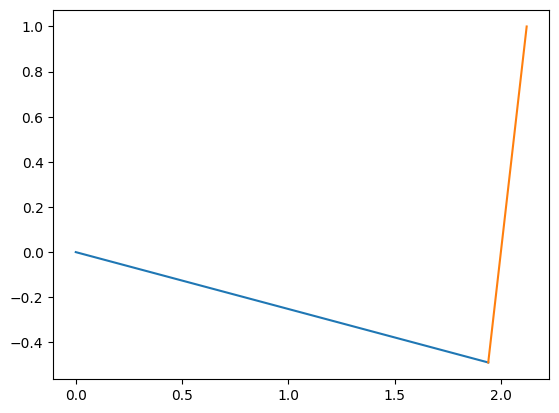

In [67]:
pointsList=[0*N.x,l1*A.x,l1*A.x+l2*B.x]
points=sympy.Matrix([[point.dot(N.x),point.dot(N.y)] for point in pointsList])
points_fun=sympy.lambdify([theta1,theta2],(points.subs(params)))

def plotMechanism(q):
    points=points_fun(*q)
    for i in range(points.shape[0]):          
        plt.plot(points[i:i+2,0],points[i:i+2,1])        

plotMechanism(out.x)